# Library yang dibutuhkan

In [ ]:
pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data?select=MELBOURNE_HOUSE_PRICES_LESS.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Bintang Abelian
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market


100%|██████████| 2.28M/2.28M [00:00<00:00, 126MB/s]

# MEMPERSIAPKAN DATASET

In [ ]:
dataset = pd.read_csv("/content/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv")

In [ ]:
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [ ]:
selected_data = dataset[["Rooms","Type","Propertycount","Distance","Price"]]

In [ ]:
onehot = pd.get_dummies(selected_data)

In [ ]:
onehot

,Rooms,Propertycount,Distance,Price,Type_h,Type_t,Type_u
0,3,4019,3.0,1490000.0,True,False,False
1,3,4019,3.0,1220000.0,True,False,False
2,3,4019,3.0,1420000.0,True,False,False
3,3,1543,7.5,1515000.0,True,False,False
4,2,3464,10.4,670000.0,True,False,False
...,...,...,...,...,...,...,...
63018,3,5833,20.6,566000.0,True,False,False
63019,3,5833,20.6,500000.0,True,False,False
63020,3,5833,20.6,545000.0,True,False,False
63021,3,7955,15.3,NaN,False,False,True


# Mengecek NaN pada Dataset

In [ ]:
onehot.isna().sum(axis=0)

Rooms                0
Propertycount        0
Distance             0
Price            14590
Type_h               0
Type_t               0
Type_u               0
dtype: int64

In [ ]:
Null_data = onehot[onehot.isnull().any(axis=1)]
Null_data

,Rooms,Propertycount,Distance,Price,Type_h,Type_t,Type_u


In [ ]:
onehot = onehot.dropna()

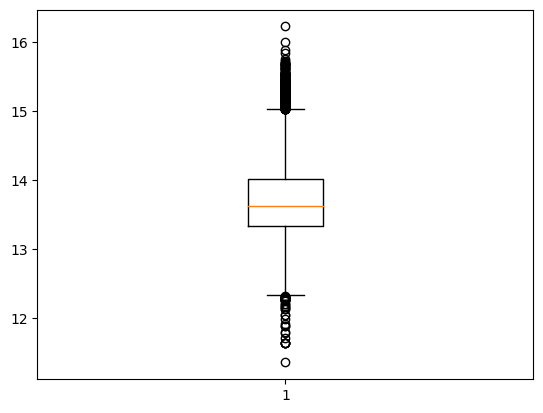

In [ ]:
plt.boxplot(np.log(onehot["Price"]))
plt.show()

In [ ]:
IQR = np.log(onehot["Price"]).quantile(0.75) - np.log(onehot["Price"]).quantile(0.25)
batas_atas = np.log(onehot["Price"]).quantile(0.75) + 1.5*IQR

In [ ]:
onehot[np.log(onehot["Price"]) > batas_atas].Price.count()

390

In [ ]:
batas_bawah = np.log(onehot["Price"]).quantile(0.25) - 1.5*IQR
onehot[np.log(onehot["Price"]) < batas_bawah].Price.count()

39

In [ ]:
onehot[np.log(onehot["Price"]) <= batas_bawah].head()

,Rooms,Propertycount,Distance,Price,Type_h,Type_t,Type_u
828,1,7570,5.1,170000.0,False,False,True
918,1,1808,6.4,210000.0,False,False,True
4100,1,7570,5.1,85000.0,False,False,True
5822,1,7570,5.1,216000.0,False,False,True
6410,6,6065,31.7,190000.0,True,False,False


In [ ]:
from google.colab import files
Null_data.to_csv("Null_data.csv")
files.download("Null_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Mengisi Null dengan Mean

In [ ]:
# Membuang Noise atau outlier yang ada
nonoise = onehot[np.log(onehot["Price"]) <= batas_atas]
nonoise = nonoise[np.log(nonoise["Price"]) >= batas_bawah]

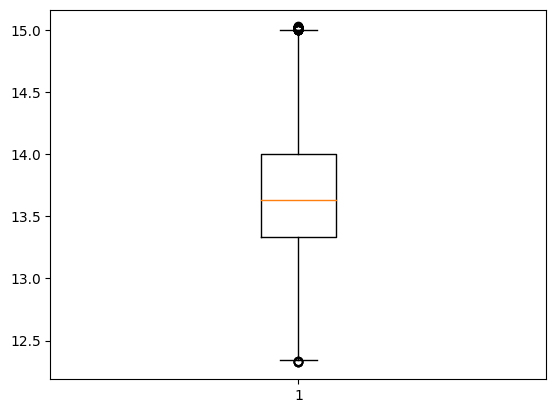

In [ ]:
# Melihat outlier yang terdapat pada dataset
plt.boxplot(np.log(nonoise["Price"]))
plt.show()

In [ ]:
nonoise['Price']=np.log(nonoise['Price'])

In [ ]:
nonoise

,Rooms,Propertycount,Distance,Price,Type_h,Type_t,Type_u
0,3,4019,3.0,14.214287,True,False,False
1,3,4019,3.0,14.014361,True,False,False
2,3,4019,3.0,14.166167,True,False,False
3,3,1543,7.5,14.230926,True,False,False
4,2,3464,10.4,13.415033,True,False,False
...,...,...,...,...,...,...,...
63016,2,17055,38.0,12.759095,False,False,True
63017,3,14577,8.4,13.602317,True,False,False
63018,3,5833,20.6,13.246349,True,False,False
63019,3,5833,20.6,13.122363,True,False,False


In [ ]:
# Mencari nilai median dari price

median = np.median(nonoise["Price"])
median

13.62918097977278

In [ ]:
Null_data["Price"] = Null_data["Price"].fillna(median)

<ipython-input-32-ecda15b3c69c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Null_data["Price"] = Null_data["Price"].fillna(median)


In [ ]:
concated = pd.concat([nonoise, Null_data])
concated.reset_index(drop=True, inplace=True)

In [ ]:
concated

,Rooms,Propertycount,Distance,Price,Type_h,Type_t,Type_u
0,3,4019,3.0,14.214287,True,False,False
1,3,4019,3.0,14.014361,True,False,False
2,3,4019,3.0,14.166167,True,False,False
3,3,1543,7.5,14.230926,True,False,False
4,2,3464,10.4,13.415033,True,False,False
...,...,...,...,...,...,...,...
62589,3,5262,27.2,13.629181,True,False,False
62590,3,6543,6.3,13.629181,False,True,False
62591,4,5678,10.4,13.629181,True,False,False
62592,3,7955,15.3,13.629181,False,False,True


# Membuat model untuk concated dataset (Median)

In [ ]:
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
train, test, target_train, target_test = train_test_split(concated.drop("Price", axis=1),concated["Price"], test_size=0.2, random_state=42)

In [ ]:
melbourn_predict = LinearRegression()
melbourn_predict.fit(train, target_train)

LinearRegression()

In [ ]:
melbourn_predict.score(train, target_train)

0.31529615326211335

In [ ]:
melbourn_predict.score(test, target_test)

0.3163928944754164

# Mengisi Null dengan Mean

In [ ]:
onehot = pd.get_dummies(selected_data)
Null_data = onehot[onehot.isnull().any(axis=1)]

In [ ]:
onehot = onehot.dropna()

In [ ]:
onehot['Price']=np.log(onehot['Price'])

In [ ]:
onehot.plot.bar()

KeyboardInterrupt: 

In [ ]:
mean=np.mean(onehot['Price'])
mean

13.681025154502414

In [ ]:
Null_data["Price"] = Null_data["Price"].fillna(mean)

In [ ]:
concated = pd.concat([onehot, Null_data])
concated.reset_index(drop=True, inplace=True)

In [ ]:
concated

,Rooms,Propertycount,Distance,Price,Type_h,Type_t,Type_u
0,3,4019,3.0,14.214287,True,False,False
1,3,4019,3.0,14.014361,True,False,False
2,3,4019,3.0,14.166167,True,False,False
3,3,1543,7.5,14.230926,True,False,False
4,2,3464,10.4,13.415033,True,False,False
...,...,...,...,...,...,...,...
63018,3,5262,27.2,13.681025,True,False,False
63019,3,6543,6.3,13.681025,False,True,False
63020,4,5678,10.4,13.681025,True,False,False
63021,3,7955,15.3,13.681025,False,False,True


# Membuat model concated dataset (Mean)

In [ ]:
train, test, target_train, target_test = train_test_split(concated.drop("Price", axis=1),concated["Price"], test_size=0.2, random_state=42)

In [ ]:
melbourn_predict = LinearRegression()
melbourn_predict.fit(train, target_train)

LinearRegression()

In [ ]:
melbourn_predict.score(train, target_train)

0.327669217872817

In [ ]:
melbourn_predict.score(test, target_test)

0.32826724236571736

In [ ]:
# Menggunakan Ridge Regression

from sklearn.linear_model import Ridge

melbourn_predict=Ridge(solver="svd")
melbourn_predict.fit(train, target_train)

Ridge(solver='svd')

In [ ]:
melbourn_predict.score(train, target_train)

0.32766921747591904

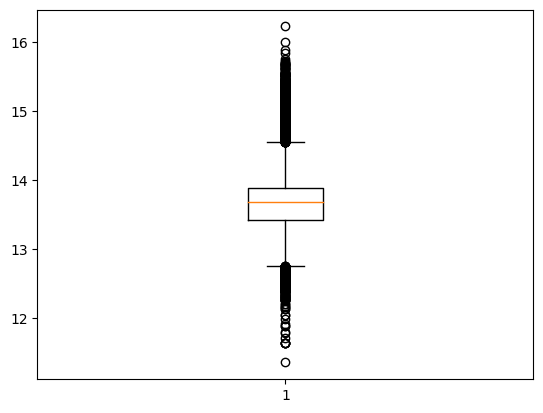

In [ ]:
plt.boxplot(concated["Price"])
plt.show()

In [ ]:
onehot

,Rooms,Propertycount,Distance,Price,Type_h,Type_t,Type_u
0,3,4019,3.0,14.214287,True,False,False
1,3,4019,3.0,14.014361,True,False,False
2,3,4019,3.0,14.166167,True,False,False
3,3,1543,7.5,14.230926,True,False,False
4,2,3464,10.4,13.415033,True,False,False
...,...,...,...,...,...,...,...
63016,2,17055,38.0,12.759095,False,False,True
63017,3,14577,8.4,13.602317,True,False,False
63018,3,5833,20.6,13.246349,True,False,False
63019,3,5833,20.6,13.122363,True,False,False


In [ ]:
Null_data

,Rooms,Propertycount,Distance,Price,Type_h,Type_t,Type_u
8,6,1899,14.0,13.681025,True,False,False
15,4,7630,15.5,13.681025,True,False,False
24,4,3052,10.2,13.681025,True,False,False
29,4,1130,16.5,13.681025,True,False,False
38,3,7809,9.7,13.681025,True,False,False
...,...,...,...,...,...,...,...
63001,3,5262,27.2,13.681025,True,False,False
63008,3,6543,6.3,13.681025,False,True,False
63010,4,5678,10.4,13.681025,True,False,False
63021,3,7955,15.3,13.681025,False,False,True


In [ ]:
# Mendapatkan kolom yang sesuai untuk diolah sebagai model prediksi
selected_data = notnullprice[["Suburb","Rooms", "Price","Type","Distance","Propertycount"]]
selected_data

,Suburb,Rooms,Price,Type,Distance,Propertycount
0,Abbotsford,3,1490000.0,h,3.0,4019
1,Abbotsford,3,1220000.0,h,3.0,4019
2,Abbotsford,3,1420000.0,h,3.0,4019
3,Aberfeldie,3,1515000.0,h,7.5,1543
4,Airport West,2,670000.0,h,10.4,3464
...,...,...,...,...,...,...
63016,Frankston,2,347700.0,u,38.0,17055
63017,Preston,3,808000.0,h,8.4,14577
63018,Roxburgh Park,3,566000.0,h,20.6,5833
63019,Roxburgh Park,3,500000.0,h,20.6,5833


In [ ]:
# Melakukan onehot encoding supaya dataset dapat dilakukan klastering
onehot = pd.get_dummies(selected_data)
onehot.reset_index(drop=True, inplace=True)
onehot

,Rooms,Price,Distance,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,...,Suburb_Yallambie,Suburb_Yan Yean,Suburb_Yarra Glen,Suburb_Yarra Junction,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,Type_h,Type_t,Type_u
0,3,1490000.0,3.0,4019,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,3,1220000.0,3.0,4019,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1420000.0,3.0,4019,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3,1515000.0,7.5,1543,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2,670000.0,10.4,3464,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48428,2,347700.0,38.0,17055,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
48429,3,808000.0,8.4,14577,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48430,3,566000.0,20.6,5833,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48431,3,500000.0,20.6,5833,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Mengecek apakah terdapat nilai null
onehot.isna().sum(axis=0)

Rooms                0
Price                0
Distance             0
Propertycount        0
Suburb_Abbotsford    0
                    ..
Suburb_croydon       0
Suburb_viewbank      0
Type_h               0
Type_t               0
Type_u               0
Length: 377, dtype: int64

In [ ]:
# Melihat tipe data pada masing-masing column
onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48433 entries, 0 to 48432
Columns: 377 entries, Rooms to Type_u
dtypes: bool(373), float64(2), int64(2)
memory usage: 18.7 MB


# Melakukan klastering untuk data yang sudah disiapkan

In [ ]:
pip install scikit-plot

In [ ]:
from scikitplot.cluster import plot_elbow_curve
from sklearn.cluster import KMeans

In [ ]:
melbourne_cluster = KMeans(random_state=42)

## Menilai dengan Elbow Method

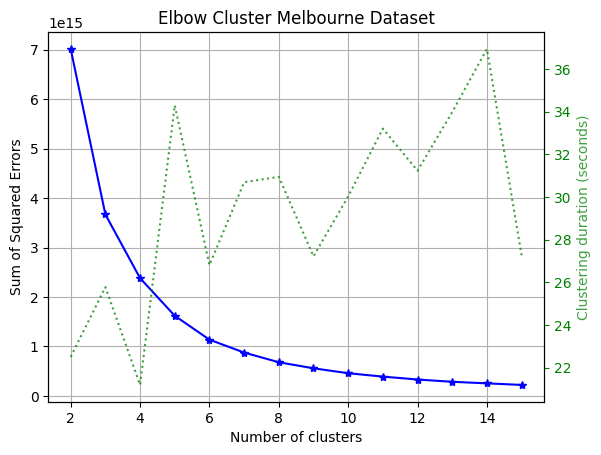

In [ ]:
plot_elbow_curve(melbourne_cluster, onehot,title="Elbow Cluster Melbourne Dataset",cluster_ranges=range(2,16),n_jobs=2)
plt.show()

## Menilai dengan  Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2,16):
  kmeans = KMeans(n_clusters=i, random_state=42)
  score = silhouette_score(onehot, kmeans.fit_predict(onehot))
  silhouette_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

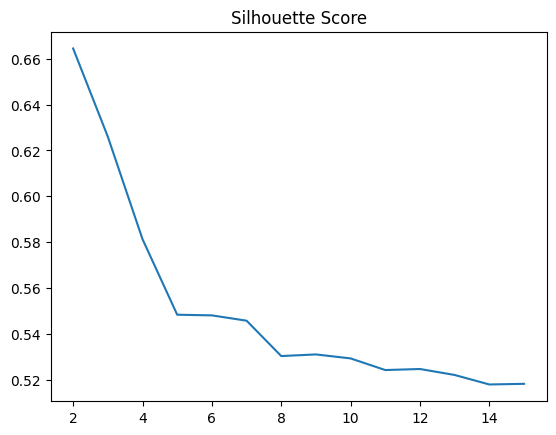

In [ ]:
plt.plot(range(2,16),silhouette_scores)
plt.title("Silhouette Score")
plt.show()

Ditemukan bahwa nilai K yang tepat untuk K Means yaitu K = 2

## Plot menggunakan TSNE

In [ ]:
melbourne_cluster = KMeans(n_clusters=2, random_state=42)
melbourne_cluster.fit(onehot)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
dimred = TSNE(n_components=2, random_state=42)

In [ ]:
reducto = dimred.fit_transform(onehot)

In [ ]:
reducto[0:3]

In [ ]:
reducto_df = pd.DataFrame(reducto)
reducto_df

In [ ]:
plt.plot(reducto_df[0], reducto_df[1], 'o')
plt.show()

In [ ]:
reducto_df[0]

In [ ]:
# # Mencari nilai perplexity yang tepat untuk TSNE
# from google.colab import files
# perplexity=[100,1000,1500]
# for perplex in perplexity:
#   dimred = TSNE(n_components=2, perplexity=perplex, random_state=42)
#   reducto = dimred.fit_transform(onehot)
#   reducto_df = pd.DataFrame(reducto)
#   reducto_df.to_csv("reducto{}.csv".format(perplex))
#   files.download("reducto{}.csv".format(perplex))
#   plt.scatter(reducto_df[0], reducto_df[1], c=melbourne_cluster.labels_, cmap='viridis')
#   plt.title(f"Perplexity: {perplex}")
#   plt.legend()
#   plt.show()

## Melihat perplexity lainya



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

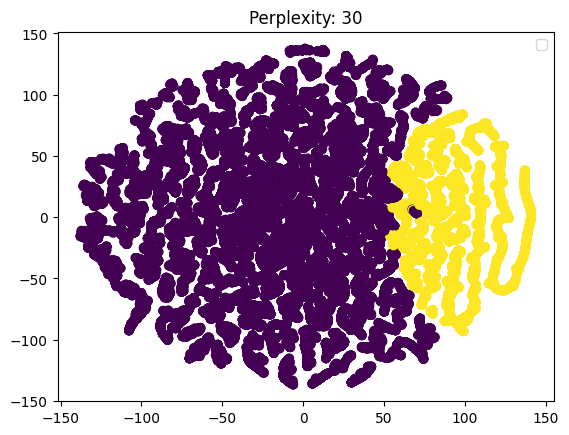

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

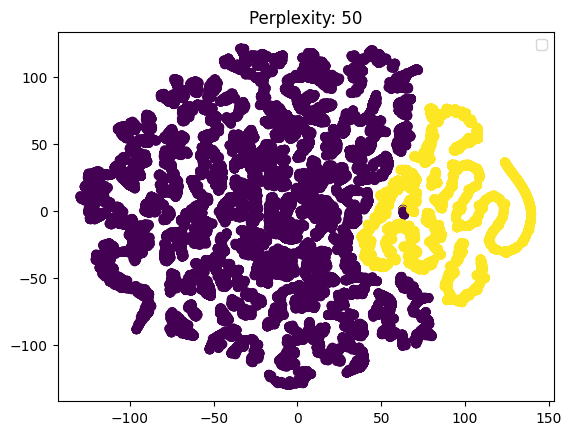

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

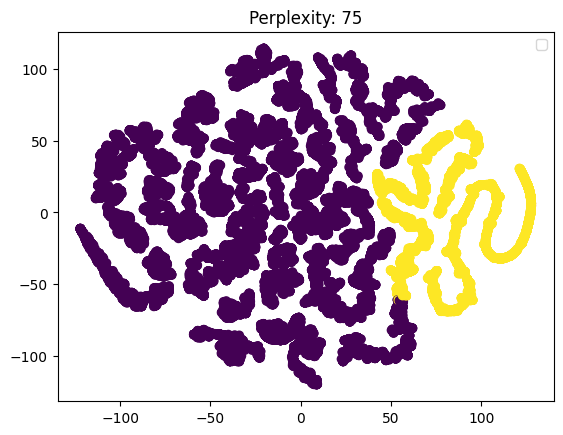

In [ ]:
from google.colab import files
perplexity=[30,50,75]
for perplex in perplexity:
  dimred = TSNE(n_components=2, perplexity=perplex, random_state=42)
  reducto = dimred.fit_transform(onehot)
  reducto_df = pd.DataFrame(reducto)
  reducto_df.to_csv("reducto{}.csv".format(perplex))
  files.download("reducto{}.csv".format(perplex))
  plt.scatter(reducto_df[0], reducto_df[1], c=melbourne_cluster.labels_, cmap='viridis')
  plt.title(f"Perplexity: {perplex}")
  plt.legend()
  plt.show()

# CEK OUTLIER MASING-MASING CLUSTER

In [ ]:
cluster0 = onehot[melbourne_cluster.labels_ == 0]
cluster1 = onehot[melbourne_cluster.labels_ == 1]

In [ ]:
# cek banyak row pada masing-masing cluster

print(cluster0.shape)
print(cluster1.shape)

(39661, 377)
(8772, 377)


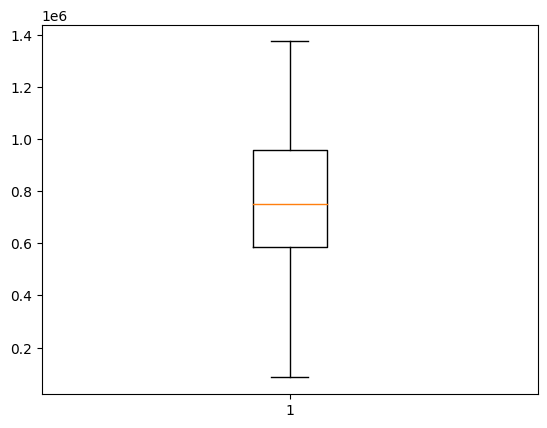

In [ ]:
plt.boxplot(cluster0["Price"])
plt.show()

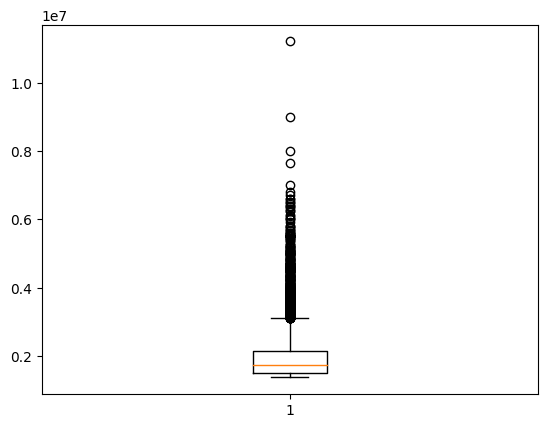

In [ ]:
plt.boxplot(cluster1["Price"])
plt.show()

## DROP OUTLIER CLUSTER 1

In [ ]:
# Mendapatkan Batas IQR dan batas atas IQR

IQR = cluster1["Price"].quantile(0.75) - cluster1["Price"].quantile(0.25)
batas_atas = cluster1["Price"].quantile(0.75) + 1.5*IQR

In [ ]:
cluster1[cluster1["Price"] > batas_atas].Price.count()

528

In [ ]:
# prompt: drop the price that stands above batas atas

cluster1 = cluster1[cluster1["Price"] <= batas_atas]

In [ ]:
cluster1.reset_index(drop=True, inplace=True)

In [ ]:
cluster0.reset_index(drop=True, inplace=True)

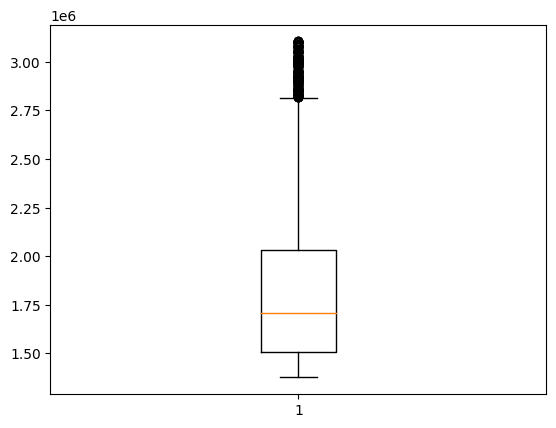

In [ ]:
# Cek outlier pada cluster 1  LAGI

plt.boxplot(cluster1["Price"])
plt.show()

In [ ]:
# BERSIHKAN OUTLIER LAGI
IQR2 = cluster1["Price"].quantile(0.75) - cluster1["Price"].quantile(0.25)
batas_atas2 = cluster1["Price"].quantile(0.75) + 1.5*IQR2

In [ ]:
# CEK BANYAKNYA OUTLIER

cluster1[cluster1["Price"] > batas_atas2].Price.count()

274

In [ ]:
# total drop outlier
274+528

802

In [ ]:
cluster1 =cluster1[cluster1["Price"] <= batas_atas2]

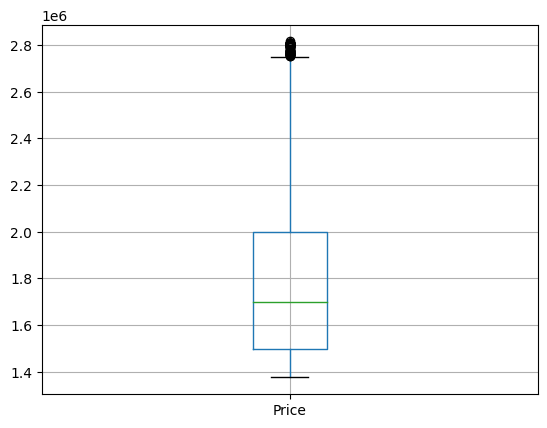

In [ ]:
cluster1.boxplot("Price")
plt.show()

In [ ]:
# Melihat banyak outlier

cluster1[cluster1["Price"] >= batas_atas2].Price.count()

0

In [ ]:
cluster1.reset_index(drop=True, inplace=True)
cluster0.reset_index(drop=True, inplace=True)

In [ ]:
# TAMPILKAN TABEL CLUSTER 1

cluster1.head()

,Rooms,Price,Distance,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,...,Suburb_Yallambie,Suburb_Yan Yean,Suburb_Yarra Glen,Suburb_Yarra Junction,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,Type_h,Type_t,Type_u
0,3,1490000.0,3.0,4019,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,3,1420000.0,3.0,4019,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1515000.0,7.5,1543,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3,1925000.0,3.0,3280,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,2,1675000.0,5.7,2211,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# TAMPILKAN TABEL CLUSTER 0

cluster0.head()

,Rooms,Price,Distance,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,...,Suburb_Yallambie,Suburb_Yan Yean,Suburb_Yarra Glen,Suburb_Yarra Junction,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,Type_h,Type_t,Type_u
0,3,1220000.0,3.0,4019,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2,670000.0,10.4,3464,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2,530000.0,10.4,3464,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2,540000.0,10.4,3464,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,715000.0,10.4,3464,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# DOWNLOAD FILE PENTING

1. CLUSTER 0
2. CLUSTER 1
3. K MEANS LABEL

In [ ]:
# Download cluster 0, cluster 1, kmeans label

cluster0.to_csv("cluster0.csv")
cluster1.to_csv("cluster1.csv")
pd.DataFrame(melbourne_cluster.labels_).to_csv("kmeans_label.csv")


files.download("cluster0.csv")
files.download("cluster1.csv")
files.download("kmeans_label.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# cek cluster 0
pd.read_csv("/content/cluster0.csv")

,Unnamed: 0,Rooms,Price,Distance,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,...,Suburb_Yallambie,Suburb_Yan Yean,Suburb_Yarra Glen,Suburb_Yarra Junction,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,Type_h,Type_t,Type_u
0,0,3,1220000.0,3.0,4019,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,2,670000.0,10.4,3464,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2,2,530000.0,10.4,3464,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3,2,540000.0,10.4,3464,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4,3,715000.0,10.4,3464,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39656,39656,2,347700.0,38.0,17055,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
39657,39657,3,808000.0,8.4,14577,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39658,39658,3,566000.0,20.6,5833,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39659,39659,3,500000.0,20.6,5833,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# CEK PLOT DIMENSI REDUCTION SETELAH DROP OUTLIER

In [ ]:
# GABUNGKAN CLUSTER 1 DAN CLUSTER 0

cluster = pd.concat([cluster0, cluster1])

In [ ]:
dimred = TSNE(n_components=2, perplexity=75, random_state=42)
reducto = dimred.fit_transform(cluster)
plt.scatter(reducto[:,0], reducto[:,1])
plt.show()